# Load Library and Dataset

In [ ]:
#Data Frame 
import pandas as pd

#Struktur Data 
import numpy as np

#Data Visualization  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Merge Dataframe
from functools import reduce

# Rounding value
import math

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Measuring Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Square root
from math import sqrt

#Time 
import time

#GRU Library 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, GRU, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Import Data
df_tlkm = pd.read_csv('/content/drive/My Drive/DATA COLAB/TA/TLKM Historical Data.csv',thousands=",")
df_kurs = pd.read_csv('/content/drive/My Drive/DATA COLAB/TA/USD_IDR Historical Data.csv',thousands=",")

#Dataset Saham Lain (ICBP)
df_icbp = pd.read_csv('/content/drive/My Drive/DATA COLAB/TA/ICBP Historical Data.csv',thousands=",")

# Pre Processing Data

### Dataset Utama

In [ ]:
#Merged All Data
dataset_merged = [df_kurs, df_tlkm, df_icbp]
dataset_merged = reduce(lambda left,right: pd.merge(left, right, on='Date', how='left'), dataset_merged)
dataset_merged = dataset_merged.iloc[::-1]
dataset_merged = dataset_merged.reset_index()
dataset_merged = dataset_merged.drop(['index','Change %','Change %_x', 'Change %_y', 'Vol._x','Vol._y'], axis = 1)
dataset_merged.columns = ['Date', 
                  'Price_KURS', 'Open_KURS', 'High_KURS', 'Low_KURS',
                     'Price_TLKM', 'Open_TLKM', 'High_TLKM', 'Low_TLKM',
                    'Price_ICBP', 'Open_ICBP', 'High_ICBP', 'Low_ICBP']
dataset_merged

,Date,Price_KURS,Open_KURS,High_KURS,Low_KURS,Price_TLKM,Open_TLKM,High_TLKM,Low_TLKM,Price_ICBP,Open_ICBP,High_ICBP,Low_ICBP
0,"Nov 01, 2016",13041.5,13026.5,13041.5,13026.5,4200.0,4230.0,4240.0,4200.0,9200.0,9350.0,9400.0,9175.0
1,"Nov 02, 2016",13056.0,13041.0,13066.0,13040.0,4200.0,4200.0,4240.0,4190.0,9150.0,9200.0,9300.0,9125.0
2,"Nov 03, 2016",13075.0,13045.0,13075.0,13045.0,4150.0,4200.0,4210.0,4120.0,8800.0,9150.0,9250.0,8800.0
3,"Nov 04, 2016",13070.0,13080.0,13115.0,13065.0,4150.0,4120.0,4160.0,4100.0,9100.0,8900.0,9125.0,8825.0
4,"Nov 07, 2016",13088.0,13072.0,13088.0,13071.0,4150.0,4150.0,4200.0,4130.0,9275.0,9050.0,9350.0,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,"Oct 25, 2021",14155.0,14165.0,14190.0,14157.5,3780.0,3800.0,3840.0,3780.0,9100.0,9100.0,9150.0,9025.0
1269,"Oct 26, 2021",14150.0,14155.0,14172.5,14142.5,3800.0,3800.0,3830.0,3780.0,9100.0,9125.0,9200.0,9075.0
1270,"Oct 27, 2021",14170.0,14160.0,14193.5,14154.5,3790.0,3820.0,3830.0,3770.0,8850.0,9150.0,9175.0,8800.0
1271,"Oct 28, 2021",14170.0,14190.0,14215.0,14172.5,3750.0,3820.0,3820.0,3710.0,8800.0,8825.0,8850.0,8675.0


In [ ]:
dataset_merged.columns

Index(['Date', 'Price_KURS', 'Open_KURS', 'High_KURS', 'Low_KURS',
       'Price_TLKM', 'Open_TLKM', 'High_TLKM', 'Low_TLKM', 'Price_ICBP',
       'Open_ICBP', 'High_ICBP', 'Low_ICBP'],
      dtype='object')

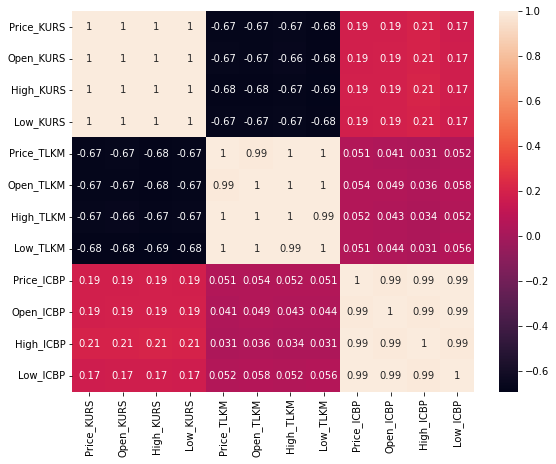

In [ ]:
#Correlation Plot
corrMatrix = dataset_merged.corr()
sns.heatmap(corrMatrix, annot=True)
mtrx=plt.gcf()
mtrx.set_size_inches(9,7)

In [ ]:
#Feature Selection
dataset_merged = dataset_merged.drop(['Open_KURS', 'High_KURS', 'Low_KURS',
                      'Open_TLKM', 'High_TLKM', 'Low_TLKM',
                      'Open_ICBP', 'High_ICBP', 'Low_ICBP'], axis = 1)
dataset_merged

,Date,Price_KURS,Price_TLKM,Price_ICBP
0,"Nov 01, 2016",13041.5,4200.0,9200.0
1,"Nov 02, 2016",13056.0,4200.0,9150.0
2,"Nov 03, 2016",13075.0,4150.0,8800.0
3,"Nov 04, 2016",13070.0,4150.0,9100.0
4,"Nov 07, 2016",13088.0,4150.0,9275.0
...,...,...,...,...
1268,"Oct 25, 2021",14155.0,3780.0,9100.0
1269,"Oct 26, 2021",14150.0,3800.0,9100.0
1270,"Oct 27, 2021",14170.0,3790.0,8850.0
1271,"Oct 28, 2021",14170.0,3750.0,8800.0


In [ ]:
#Check Missing Value
dataset_merged.isnull().sum()

Date           0
Price_KURS     0
Price_TLKM    63
Price_ICBP    63
dtype: int64

In [ ]:
#Fill Missing Value
dataset_merged = dataset_merged.fillna(method='ffill')
dataset_merged.isnull().values.any()
dataset_merged.isnull().sum()

Date          0
Price_KURS    0
Price_TLKM    0
Price_ICBP    0
dtype: int64

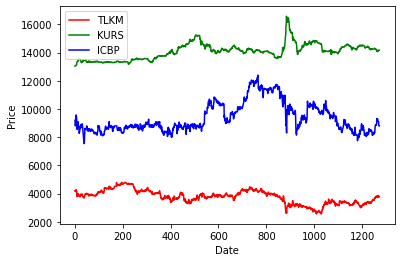

In [ ]:
plt.plot(dataset_merged['Price_TLKM'], color = 'red', label = 'TLKM')
plt.plot(dataset_merged['Price_KURS'], color = 'green', label = 'KURS')
plt.plot(dataset_merged['Price_ICBP'], color = 'blue', label = 'ICBP')
#plt.title('Grafik KURS dan TLKM') 
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.legend() 
plt.show() 

# Split Data and Feature Scaling

In [ ]:
df = dataset_merged.loc[:,['Price_KURS','Price_TLKM']]

In [ ]:
# Partition data into data train, val & test
totaldata = df
totaldatatrain = int(len(totaldata)*0.6)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.3)

# Store data into each partition
df_train= df[0:totaldatatrain]
df_valid=df[totaldatatrain:totaldatatrain+totaldataval]
df_test= df[totaldatatrain+totaldataval:]

In [ ]:
print("Jumlah data train:",(len(df_train)))
print("Jumlah data valid:",(len(df_valid)))
print("Jumlah data test:",(len(df_test)))

Jumlah data train: 763
Jumlah data valid: 127
Jumlah data test: 383


In [ ]:
# Data Train
train_univ, train_multiv =  df_train.iloc[:,1:2], df_train.iloc[:,:2] #train_univ = close price, train_multiv = close price dan kurs

#Data Valid
valid_univ, valid_multiv = df_valid.iloc[:,1:2], df_valid.iloc[:,:2]

#Data Test
test_univ, test_multiv = df_test.iloc[:,1:2], df_test.iloc[:,:2]


In [ ]:
#Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1)) #untuk univariate
scM = MinMaxScaler(feature_range = (0, 1)) #untuk multivariate

In [ ]:
train_univ = sc.fit_transform(train_univ)
valid_univ = sc.fit_transform(valid_univ)
test_univ = sc.fit_transform(test_univ)

train_multiv = scM.fit_transform(train_multiv)
valid_multiv = scM.fit_transform(valid_multiv)
test_multiv = scM.fit_transform(test_multiv)

test_multiv

array([[0.99040307, 0.41221374],
       [1.        , 0.4351145 ],
       [0.98080614, 0.48854962],
       [0.97600768, 0.58778626],
       [0.88483685, 0.50381679],
       [0.88483685, 0.41984733],
       [0.74856046, 0.42748092],
       [0.6756238 , 0.47328244],
       [0.6756238 , 0.51908397],
       [0.65067179, 0.41984733],
       [0.67946257, 0.33587786],
       [0.59884837, 0.51145038],
       [0.59213052, 0.42748092],
       [0.6084453 , 0.38931298],
       [0.60652591, 0.45801527],
       [0.58733205, 0.38931298],
       [0.58733205, 0.40458015],
       [0.5815739 , 0.45038168],
       [0.59596929, 0.45801527],
       [0.54702495, 0.60305344],
       [0.38579655, 0.71755725],
       [0.47216891, 0.58015267],
       [0.46449136, 0.58015267],
       [0.45105566, 0.51908397],
       [0.40307102, 0.48091603],
       [0.39347409, 0.50381679],
       [0.39731286, 0.45038168],
       [0.38195777, 0.45801527],
       [0.38963532, 0.38931298],
       [0.38003839, 0.41221374],
       [0.

# Struktur Data

In [ ]:
#Define timesteps
timestep = 15

### Struktur Data Univariate

In [ ]:
#Struktur Data Training Univariate

x_train_uni = []
y_train_uni = []
for i in range(timestep, len(train_univ)): 
    x_train_uni.append(train_univ[(i-timestep):i]) 
    y_train_uni.append(train_univ[i,0]) 
x_train_uni, y_train_uni = np.array(x_train_uni), np.array(y_train_uni) #Auto 3D
for i in range(len(x_train_uni)): #Merge
    print(x_train_uni[i], y_train_uni[i]) #Cek Struktur Data

Streaming output truncated to the last 5000 lines.
 [0.22222222]
 [0.22222222]
 [0.2875817 ]
 [0.22222222]
 [0.20261438]] 0.2549019607843137
[[0.36601307]
 [0.33986928]
 [0.32679739]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.2875817 ]
 [0.22222222]
 [0.20261438]
 [0.25490196]] 0.27450980392156854
[[0.33986928]
 [0.32679739]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.2875817 ]
 [0.22222222]
 [0.20261438]
 [0.25490196]
 [0.2745098 ]] 0.2875816993464051
[[0.32679739]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.2875817 ]
 [0.22222222]
 [0.20261438]
 [0.25490196]
 [0.2745098 ]
 [0.2875817 ]] 0.2549019607843137
[[0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.22222222]
 [0.2875817 ]
 [0.22222222]
 [0.20261438]
 [0.25490196]


In [ ]:
#Struktur Data Validation Univariate

x_valid_uni = []
y_valid_uni = []
for i in range(timestep, len(valid_univ)): 
    x_valid_uni.append(valid_univ[(i-timestep):i]) 
    y_valid_uni.append(valid_univ[i,0]) 
x_valid_uni, y_valid_uni = np.array(x_valid_uni), np.array(y_valid_uni) #Auto 3D
for i in range(len(x_valid_uni)): #Merge
    print(x_valid_uni[i], y_valid_uni[i]) #Cek Struktur Data

[[0.90751445]
 [0.86127168]
 [0.84971098]
 [0.86705202]
 [0.86127168]
 [0.89595376]
 [0.90751445]
 [0.89595376]
 [0.89595376]
 [0.89595376]
 [0.90751445]
 [0.9132948 ]
 [0.93063584]
 [0.94797688]
 [1.        ]] 0.9595375722543356
[[0.86127168]
 [0.84971098]
 [0.86705202]
 [0.86127168]
 [0.89595376]
 [0.90751445]
 [0.89595376]
 [0.89595376]
 [0.89595376]
 [0.90751445]
 [0.9132948 ]
 [0.93063584]
 [0.94797688]
 [1.        ]
 [0.95953757]] 0.947976878612717
[[0.84971098]
 [0.86705202]
 [0.86127168]
 [0.89595376]
 [0.90751445]
 [0.89595376]
 [0.89595376]
 [0.89595376]
 [0.90751445]
 [0.9132948 ]
 [0.93063584]
 [0.94797688]
 [1.        ]
 [0.95953757]
 [0.94797688]] 0.9884393063583818
[[0.86705202]
 [0.86127168]
 [0.89595376]
 [0.90751445]
 [0.89595376]
 [0.89595376]
 [0.89595376]
 [0.90751445]
 [0.9132948 ]
 [0.93063584]
 [0.94797688]
 [1.        ]
 [0.95953757]
 [0.94797688]
 [0.98843931]] 0.953757225433526
[[0.86127168]
 [0.89595376]
 [0.90751445]
 [0.89595376]
 [0.89595376]
 [0.89595376

In [ ]:
# Struktur Data Test Univariate

x_test_uni = []
y_test_uni = []
for i in range(timestep, len(test_univ)): 
    x_test_uni.append(test_univ[(i-timestep):i]) #Input: 0-59 Kurs Stock
    y_test_uni.append(test_univ[i,0]) #Output: 60 Stock
x_test_uni, y_test_uni = np.array(x_test_uni), np.array(y_test_uni) #Auto 3D
for i in range(len(x_test_uni)): #Merge
	print(x_test_uni[i], y_test_uni[i]) #Cek Struktur Data
y_test_uni = np.reshape(y_test_uni, (y_test_uni.shape[0], 1)) #supaya bisa di invers harus pny 2 dimensi
y_test_uni = sc.inverse_transform(y_test_uni)

Streaming output truncated to the last 5000 lines.
 [0.39694656]
 [0.35877863]
 [0.40458015]
 [0.48854962]
 [0.49618321]] 0.5496183206106873
[[0.4351145 ]
 [0.45038168]
 [0.52671756]
 [0.55725191]
 [0.5648855 ]
 [0.51145038]
 [0.51145038]
 [0.44274809]
 [0.41984733]
 [0.39694656]
 [0.35877863]
 [0.40458015]
 [0.48854962]
 [0.49618321]
 [0.54961832]] 0.5496183206106873
[[0.45038168]
 [0.52671756]
 [0.55725191]
 [0.5648855 ]
 [0.51145038]
 [0.51145038]
 [0.44274809]
 [0.41984733]
 [0.39694656]
 [0.35877863]
 [0.40458015]
 [0.48854962]
 [0.49618321]
 [0.54961832]
 [0.54961832]] 0.48854961832061083
[[0.52671756]
 [0.55725191]
 [0.5648855 ]
 [0.51145038]
 [0.51145038]
 [0.44274809]
 [0.41984733]
 [0.39694656]
 [0.35877863]
 [0.40458015]
 [0.48854962]
 [0.49618321]
 [0.54961832]
 [0.54961832]
 [0.48854962]] 0.43511450381679384
[[0.55725191]
 [0.5648855 ]
 [0.51145038]
 [0.51145038]
 [0.44274809]
 [0.41984733]
 [0.39694656]
 [0.35877863]
 [0.40458015]
 [0.48854962]
 [0.49618321]
 [0.54961832]

### Struktur Data Multivariate

In [ ]:
#Struktur Data Training Multivariate

x_train_multi = []
y_train_multi = []
for i in range(timestep, len(train_multiv)): 
    x_train_multi.append(train_multiv[(i-timestep):i]) 
    y_train_multi.append(train_univ[i,0]) 
x_train_multi, y_train_multi = np.array(x_train_multi), np.array(y_train_multi) #Auto 3D
for i in range(len(x_train_multi)): #Merge
    print(x_train_multi[i], y_train_multi[i]) #Cek Struktur Data

Streaming output truncated to the last 5000 lines.
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.2875817 ]
 [0.48392979 0.22222222]
 [0.47344427 0.20261438]] 0.2549019607843137
[[0.38180989 0.36601307]
 [0.36972874 0.33986928]
 [0.37770686 0.32679739]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.2875817 ]
 [0.48392979 0.22222222]
 [0.47344427 0.20261438]
 [0.5076362  0.25490196]] 0.27450980392156854
[[0.36972874 0.33986928]
 [0.37770686 0.32679739]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.22222222]
 [0.40506041 0.2875817 ]
 [0.48392979 0.22222222]
 [0.47344427 0.20261438]
 [0.5076362  0.25490196]
 [0.51812172 0.2745098 ]] 0.2875816993464051
[[0.37770686 

In [ ]:
#Struktur Data Validation Multivariate

x_valid_multi = []
y_valid_multi = []
for i in range(timestep, len(valid_multiv)): 
    x_valid_multi.append(valid_multiv[(i-timestep):i]) 
    y_valid_multi.append(valid_univ[i,0]) 
x_valid_multi, y_valid_multi = np.array(x_valid_multi), np.array(y_valid_multi) #Auto 3D
for i in range(len(x_valid_multi)): #Merge
    print(x_valid_multi[i], y_valid_multi[i]) #Cek Struktur Data

[[0.18734388 0.90751445]
 [0.19650291 0.86127168]
 [0.194005   0.84971098]
 [0.19900083 0.86705202]
 [0.1928393  0.86127168]
 [0.18501249 0.89595376]
 [0.1886761  0.90751445]
 [0.19733555 0.89595376]
 [0.19866778 0.89595376]
 [0.19167361 0.89595376]
 [0.19050791 0.90751445]
 [0.1683597  0.9132948 ]
 [0.15570358 0.93063584]
 [0.15203997 0.94797688]
 [0.16203164 1.        ]] 0.9595375722543356
[[0.19650291 0.86127168]
 [0.194005   0.84971098]
 [0.19900083 0.86705202]
 [0.1928393  0.86127168]
 [0.18501249 0.89595376]
 [0.1886761  0.90751445]
 [0.19733555 0.89595376]
 [0.19866778 0.89595376]
 [0.19167361 0.89595376]
 [0.19050791 0.90751445]
 [0.1683597  0.9132948 ]
 [0.15570358 0.93063584]
 [0.15203997 0.94797688]
 [0.16203164 1.        ]
 [0.1540383  0.95953757]] 0.947976878612717
[[0.194005   0.84971098]
 [0.19900083 0.86705202]
 [0.1928393  0.86127168]
 [0.18501249 0.89595376]
 [0.1886761  0.90751445]
 [0.19733555 0.89595376]
 [0.19866778 0.89595376]
 [0.19167361 0.89595376]
 [0.1905079

In [ ]:
# Struktur Data Test Multivariate

x_test_multi = []
y_test_multi = []
for i in range(timestep, len(test_multiv)): 
    x_test_multi.append(test_multiv[(i-timestep):i]) 
    y_test_multi.append(test_univ[i,0])
x_test_multi, y_test_multi = np.array(x_test_multi), np.array(y_test_multi) #Auto 3D
for i in range(len(x_test_multi)): #Merge
	print(x_test_multi[i], y_test_multi[i]) #Cek Struktur Data
y_test_multi = np.reshape(y_test_multi, (y_test_multi.shape[0], 1))
y_test_multi = sc.inverse_transform(y_test_multi)

Streaming output truncated to the last 5000 lines.
 [0.05566219 0.39694656]
 [0.09788868 0.35877863]
 [0.0940499  0.40458015]
 [0.08445298 0.48854962]
 [0.0815739  0.49618321]] 0.5496183206106873
[[0.3243762  0.4351145 ]
 [0.2840691  0.45038168]
 [0.20921305 0.52671756]
 [0.08637236 0.55725191]
 [0.08637236 0.5648855 ]
 [0.         0.51145038]
 [0.00575816 0.51145038]
 [0.00767754 0.44274809]
 [0.04222649 0.41984733]
 [0.05566219 0.39694656]
 [0.09788868 0.35877863]
 [0.0940499  0.40458015]
 [0.08445298 0.48854962]
 [0.0815739  0.49618321]
 [0.08253359 0.54961832]] 0.5496183206106873
[[0.2840691  0.45038168]
 [0.20921305 0.52671756]
 [0.08637236 0.55725191]
 [0.08637236 0.5648855 ]
 [0.         0.51145038]
 [0.00575816 0.51145038]
 [0.00767754 0.44274809]
 [0.04222649 0.41984733]
 [0.05566219 0.39694656]
 [0.09788868 0.35877863]
 [0.0940499  0.40458015]
 [0.08445298 0.48854962]
 [0.0815739  0.49618321]
 [0.08253359 0.54961832]
 [0.08829175 0.54961832]] 0.48854961832061083
[[0.20921305 

# Training dan Tuning Hyperparameter

In [ ]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb
from wandb.keras import WandbCallback

In [ ]:
# Select the hyperparameters you want to tune. This is specified like the following:
sweep_config = {
   'method': 'grid',
   'parameters': {
       'units': {
           'values': [32, 64, 128]
       },
       'optimizer' : {
           'values': ["adam", "sgd", "rmsprop"]
       },
       'epochs': {
           'values' : [50, 100]
       },
       'batch_size': {
           'values' : [32, 64, 128]
       },
       'dropout': {
           'values' : [0.1, 0.3, 0.5]
       }
   }
}

import pprint
pprint.pprint(sweep_config)

{'method': 'grid',
 'parameters': {'batch_size': {'values': [32, 64, 128]},
                'dropout': {'values': [0.1, 0.3, 0.5]},
                'epochs': {'values': [50, 100]},
                'optimizer': {'values': ['adam', 'sgd', 'rmsprop']},
                'units': {'values': [32, 64, 128]}}}


In [ ]:
#TENTUKAN NAMA PROJECT UNTUK WANDB
#Untuk multivariate tinggal ganti nama project dan data

# Initialize a new sweep
# Arguments:
#     – sweep_config: the sweep config dictionary defined above
#     – entity: Set the username for the sweep
#     – project: Set the project name for the sweep
sweep_id = wandb.sweep(sweep_config, project="Training Univariate")

Create sweep with ID: a2j964yx
Sweep URL: https://wandb.ai/abshariazka/Training%20Univariate/sweeps/a2j964yx


In [ ]:
#TRAINING MODEL DAN TUNING PARAMETER UNIVARIATE DAN MULTIVARIATE
#Tinggal ganti data kalo mau ganti dr univ ke multiv

# The sweep calls this function with each set of hyperparameters
def train():
    # Default values for hyper-parameters we're going to sweep over
    config_defaults = {
        'layers': 32,
        'optimizer': 'adam',
        'epochs': 50,
        'batch_size': 32,
        'dropout' : 0.1
    }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    # Define the model architecture - This is a simplified version of the VGG19 architecture
    model_univ = Sequential()
    
    # Set
    model_univ.add(GRU(units=config.layers, activation = "relu", 
                                 input_shape=(x_train_uni.shape[1], x_train_uni.shape[2])))
    model_univ.add(Dropout(rate = config.dropout))
    model_univ.add(Dense(units=1))
    model_univ.compile(loss = "mean_squared_error", optimizer = config.optimizer)
    model_univ.fit(x_train_uni, y_train_uni, validation_data=(x_valid_uni,y_valid_uni), batch_size=config.batch_size,
              epochs=config.epochs,
              callbacks=[WandbCallback(define_metric=True)])
    pred = model_univ.predict(x_test_uni)
    y_test_pred = sc.inverse_transform(pred)
    rmse = sqrt(mean_squared_error(y_test_uni, y_test_pred))
    wandb.log({"RMSE": rmse})
    mape = mean_absolute_percentage_error(y_test_uni, y_test_pred)
    wandb.log({"MAPE": mape})


In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: qcijpnam with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.1
wandb: 	epochs: 50
wandb: 	optimizer: adam
wandb: 	units: 32


Epoch 1/50
24/24 [==============================] - 10s 66ms/step - loss: 0.2540 - val_loss: 0.2959 - _timestamp: 1659000883.0000 - _runtime: 19.0000
Epoch 2/50
24/24 [==============================] - 1s 29ms/step - loss: 0.0953 - val_loss: 0.0872 - _timestamp: 1659000883.0000 - _runtime: 19.0000
Epoch 3/50
24/24 [==============================] - 1s 29ms/step - loss: 0.0260 - val_loss: 0.0154 - _timestamp: 1659000884.0000 - _runtime: 20.0000
Epoch 4/50
24/24 [==============================] - 1s 32ms/step - loss: 0.0122 - val_loss: 0.0062 - _timestamp: 1659000885.0000 - _runtime: 21.0000
Epoch 5/50
24/24 [==============================] - 1s 26ms/step - loss: 0.0077 - val_loss: 0.0047 - _timestamp: 1659000885.0000 - _runtime: 21.0000
Epoch 6/50
24/24 [==============================] - 1s 33ms/step - loss: 0.0077 - val_loss: 0.0045 - _timestamp: 1659000886.0000 - _runtime: 22.0000
Epoch 7/50
24/24 [==============================] - 1s 31ms/step - loss: 0.0069 - val_loss: 0.0041 - _tim

wandb: Ctrl + C detected. Stopping sweep.


# Building GRU Forecasting Model

In [ ]:
#Initializaton Parameters
epochs_univ = 100 
units_univ = 128
dropout_univ = 0.1
batch_size_univ = 64
optimizer_univ = "rmsprop"

### Best Model Univariate

In [ ]:
# DEFINE MODEL ARCHITECTURE
model_univ = Sequential()
    
# HIDDEN LAYER
model_univ.add(GRU(units=units_univ, activation = "relu", 
                                 input_shape=(x_train_uni.shape[1], x_train_uni.shape[2])))
model_univ.add(Dropout(rate = dropout_univ))

#OUTPUT LAYER
model_univ.add(Dense(units=1))

#COMPILE GRU
model_univ.compile(loss = "mean_squared_error", optimizer = optimizer_univ)

#FIT MODEL
start_time = time.time()
model_univariate = model_univ.fit(x_train_uni, y_train_uni, validation_data=(x_valid_uni,y_valid_uni), batch_size=batch_size_univ,
              epochs=epochs_univ)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Epoch 1/100
12/12 [==============================] - 2s 50ms/step - loss: 0.0797 - val_loss: 0.0096
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0080 - val_loss: 0.0110
Epoch 3/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0058 - val_loss: 0.0094
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 5/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0039 - val_loss: 0.0051
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0053 - val_loss: 0.0065
Epoch 7/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 8/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0037 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 10/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0043 - val_loss: 0.0066

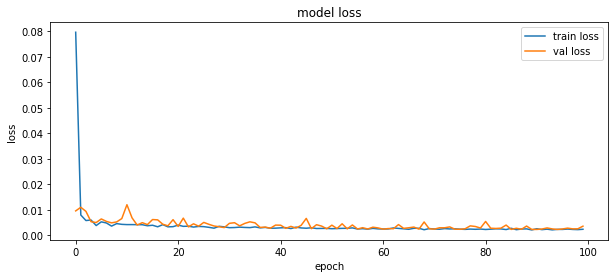

In [ ]:
# Graph model loss (train loss & val loss)
fig_univ = plt.figure(figsize=(10, 4))
plt.plot(model_univariate.history['loss'], label='train loss')
plt.plot(model_univariate.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#fig_univ.savefig("/content/drive/My Drive/DATA COLAB/NEW/lossUniv.jpeg") 

In [ ]:
pred_testing_univ = model_univ.predict(x_test_uni)
y_test_pred_univ = sc.inverse_transform(pred_testing_univ)

In [ ]:
rmse_univ = sqrt(mean_squared_error(y_test_uni, y_test_pred_univ))
mape_univ = mean_absolute_percentage_error(y_test_uni, y_test_pred_univ)

In [ ]:
print(mape_univ)
print(rmse_univ)

0.017663836828206828
70.64952548818589


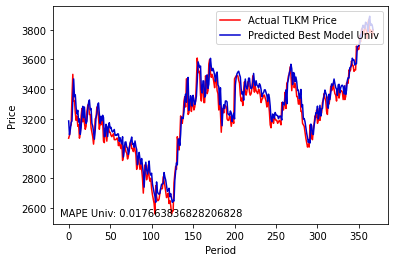

In [ ]:
#PLOT FORECASTING
plotForecast_univ = plt.gcf()
plt.plot(y_test_uni, color = 'red', label = 'Actual TLKM Price')
plt.plot(y_test_pred_univ, color = 'mediumblue', label = 'Predicted Best Model Univ')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.figtext(0.14, 0.15, "MAPE Univ: " +str(mape_univ))
plt.show()

In [ ]:
#plotForecast_univ.savefig("/content/drive/My Drive/DATA COLAB/NEW/forecastUniv.jpeg") 

In [ ]:
#forecast = pd.DataFrame(y_test)
#forecast.columns = ['Forecast']
#forecast.to_excel("/content/drive/My Drive/DATA COLAB/NEW/univ.xlsx")

### Best Model Multivariate

In [ ]:
#INITIALIZATION PARAMETERS
epochs_multiv = 100
units_multiv = 64
dropout_multiv = 0.1
batch_size_multiv = 32
optimizer_multiv = "adam"

In [ ]:
# DEFINE MODEL ARCHITECTURE
model_multiv = Sequential()
    
# HIDDEN LAYER
model_multiv.add(GRU(units=units_multiv, activation = "relu", 
                                 input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
model_multiv.add(Dropout(rate = dropout_multiv))

#OUTPUT LAYER
model_multiv.add(Dense(units=1))

#COMPILE GRU
model_multiv.compile(loss = "mean_squared_error", optimizer = optimizer_multiv)

#FIT MODEL
start_time = time.time()
model_multivariate = model_multiv.fit(x_train_multi, y_train_multi, validation_data=(x_valid_multi,y_valid_multi), batch_size=batch_size_multiv,
              epochs=epochs_multiv)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Epoch 1/100
24/24 [==============================] - 2s 26ms/step - loss: 0.1591 - val_loss: 0.0945
Epoch 2/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0306 - val_loss: 0.0162
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0087 - val_loss: 0.0091
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 6/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0045 - val_loss: 0.0049

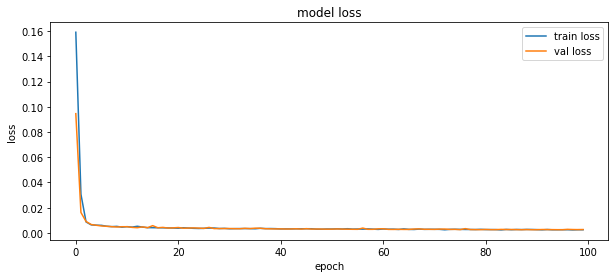

In [ ]:
# Graph model loss (train loss & val loss)
fig_multiv = plt.figure(figsize=(10, 4))
plt.plot(model_multivariate.history['loss'], label='train loss')
plt.plot(model_multivariate.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#fig_multiv.savefig("/content/drive/My Drive/DATA COLAB/TERAKHIR/lossMultiv.jpeg") 

In [ ]:
pred_testing_multiv = model_multiv.predict(x_test_multi)
y_test_pred_multiv = sc.inverse_transform(pred_testing_multiv)

rmse_multiv = sqrt(mean_squared_error(y_test_multi, y_test_pred_multiv))
mape_multiv = mean_absolute_percentage_error(y_test_multi, y_test_pred_multiv)

print(mape_multiv)
print(rmse_multiv)

0.015812587351677444
66.03453823039078


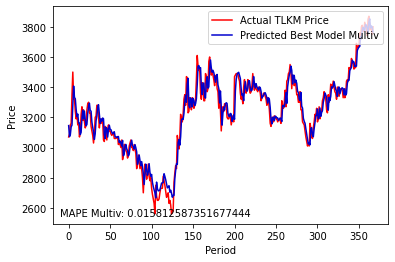

In [ ]:
#PLOT FORECASTING
plotForecast_multiv = plt.gcf()
plt.plot(y_test_multi, color = 'red', label = 'Actual TLKM Price')
plt.plot(y_test_pred_multiv, color = 'mediumblue', label = 'Predicted Best Model Multiv')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.figtext(0.14, 0.15, "MAPE Multiv: " +str(mape_multiv))
plt.show()

In [ ]:
#plotForecast_multiv.savefig("/content/drive/My Drive/DATA COLAB/TERAKHIR/forecastMultiv.jpeg") 

# Dataset ICBP

In [ ]:
df_testing_icbp = dataset_merged.loc[:,['Price_KURS','Price_ICBP']]

In [ ]:
# Partition data into data train, val & test
totaldata = df_testing_icbp
totaldatatrain = int(len(totaldata)*0.6)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.3)

# Store data into each partition
df_train_icbp= df_testing_icbp[0:totaldatatrain]
df_valid_icbp=df_testing_icbp[totaldatatrain:totaldatatrain+totaldataval]
df_test_icbp= df_testing_icbp[totaldatatrain+totaldataval:]

In [ ]:
# Data Train
train_univ_icbp, train_multiv_icbp =  df_train_icbp.iloc[:,1:2], df_train_icbp.iloc[:,:2] #train_univ = close price, train_multiv = close price dan kurs

#Data Valid
valid_univ_icbp, valid_multiv_icbp = df_valid_icbp.iloc[:,1:2], df_valid_icbp.iloc[:,:2]

#Data Test
test_univ_icbp, test_multiv_icbp = df_test_icbp.iloc[:,1:2], df_test_icbp.iloc[:,:2]


In [ ]:
#Feature Scaling
scI = MinMaxScaler(feature_range = (0, 1)) #untuk univariate ICBP
scK = MinMaxScaler(feature_range = (0, 1)) #untuk multivariate ICBP

In [ ]:
train_univ_icbp = scI.fit_transform(train_univ_icbp)
valid_univ_icbp = scI.fit_transform(valid_univ_icbp)
test_univ_icbp = scI.fit_transform(test_univ_icbp)

train_multiv_icbp = scK.fit_transform(train_multiv_icbp)
valid_multiv_icbp = scK.fit_transform(valid_multiv_icbp)
test_multiv_icbp = scK.fit_transform(test_multiv_icbp)

## Stuktur Data ICBP

In [ ]:
timestep

In [ ]:
#Struktur Data Training Univariate ICBP

x_train_uni_icbp = []
y_train_uni_icbp = []
for i in range(timestep, len(train_univ_icbp)): 
    x_train_uni_icbp.append(train_univ_icbp[(i-timestep):i]) 
    y_train_uni_icbp.append(train_univ_icbp[i,0]) 
x_train_uni_icbp, y_train_uni_icbp = np.array(x_train_uni_icbp), np.array(y_train_uni_icbp) #Auto 3D
for i in range(len(x_train_uni_icbp)): #Merge
    print(x_train_uni_icbp[i], y_train_uni_icbp[i]) #Cek Struktur Data

Streaming output truncated to the last 5000 lines.
 [0.27956989]
 [0.27956989]
 [0.22580645]
 [0.15053763]
 [0.1827957 ]] 0.2580645161290325
[[0.26344086]
 [0.27956989]
 [0.31182796]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.22580645]
 [0.15053763]
 [0.1827957 ]
 [0.25806452]] 0.2688172043010755
[[0.27956989]
 [0.31182796]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.22580645]
 [0.15053763]
 [0.1827957 ]
 [0.25806452]
 [0.2688172 ]] 0.22043010752688175
[[0.31182796]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.22580645]
 [0.15053763]
 [0.1827957 ]
 [0.25806452]
 [0.2688172 ]
 [0.22043011]] 0.20967741935483875
[[0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.27956989]
 [0.22580645]
 [0.15053763]
 [0.1827957 ]
 [0.25806452]

In [ ]:
#Struktur Data Validation Univariate ICBP

x_valid_uni_icbp = []
y_valid_uni_icbp = []
for i in range(timestep, len(valid_univ_icbp)): 
    x_valid_uni_icbp.append(valid_univ_icbp[(i-timestep):i]) 
    y_valid_uni_icbp.append(valid_univ_icbp[i,0]) 
x_valid_uni_icbp, y_valid_uni_icbp = np.array(x_valid_uni_icbp), np.array(y_valid_uni_icbp) #Auto 3D
for i in range(len(x_valid_uni_icbp)): #Merge
    print(x_valid_uni_icbp[i], y_valid_uni_icbp[i]) #Cek Struktur Data

[[0.95731707]
 [0.9695122 ]
 [1.        ]
 [0.90243902]
 [0.76829268]
 [0.81097561]
 [0.80487805]
 [0.75      ]
 [0.73780488]
 [0.79268293]
 [0.72560976]
 [0.75609756]
 [0.76219512]
 [0.7804878 ]
 [0.80487805]] 0.7621951219512195
[[0.9695122 ]
 [1.        ]
 [0.90243902]
 [0.76829268]
 [0.81097561]
 [0.80487805]
 [0.75      ]
 [0.73780488]
 [0.79268293]
 [0.72560976]
 [0.75609756]
 [0.76219512]
 [0.7804878 ]
 [0.80487805]
 [0.76219512]] 0.8292682926829267
[[1.        ]
 [0.90243902]
 [0.76829268]
 [0.81097561]
 [0.80487805]
 [0.75      ]
 [0.73780488]
 [0.79268293]
 [0.72560976]
 [0.75609756]
 [0.76219512]
 [0.7804878 ]
 [0.80487805]
 [0.76219512]
 [0.82926829]] 0.8048780487804876
[[0.90243902]
 [0.76829268]
 [0.81097561]
 [0.80487805]
 [0.75      ]
 [0.73780488]
 [0.79268293]
 [0.72560976]
 [0.75609756]
 [0.76219512]
 [0.7804878 ]
 [0.80487805]
 [0.76219512]
 [0.82926829]
 [0.80487805]] 0.8231707317073171
[[0.76829268]
 [0.81097561]
 [0.80487805]
 [0.75      ]
 [0.73780488]
 [0.792682

In [ ]:
# Struktur Data Test Univariate ICBP

x_test_uni_icbp = []
y_test_uni_icbp = []
for i in range(timestep, len(test_univ_icbp)): 
    x_test_uni_icbp.append(test_univ_icbp[(i-timestep):i]) #Input: 0-59 Kurs Stock
    y_test_uni_icbp.append(test_univ_icbp[i,0]) #Output: 60 Stock
x_test_uni_icbp, y_test_uni_icbp = np.array(x_test_uni_icbp), np.array(y_test_uni_icbp) #Auto 3D
for i in range(len(x_test_uni_icbp)): #Merge
	print(x_test_uni_icbp[i], y_test_uni_icbp[i]) #Cek Struktur Data
y_test_uni_icbp = np.reshape(y_test_uni_icbp, (y_test_uni_icbp.shape[0], 1)) #supaya bisa di invers harus pny 2 dimensi
y_test_uni_icbp = scI.inverse_transform(y_test_uni_icbp)

Streaming output truncated to the last 5000 lines.
 [0.29824561]
 [0.29824561]
 [0.33333333]
 [0.39473684]
 [0.42105263]] 0.3508771929824559
[[0.20175439]
 [0.14035088]
 [0.25438596]
 [0.26315789]
 [0.26315789]
 [0.30701754]
 [0.35964912]
 [0.40350877]
 [0.31578947]
 [0.29824561]
 [0.29824561]
 [0.33333333]
 [0.39473684]
 [0.42105263]
 [0.35087719]] 0.4122807017543857
[[0.14035088]
 [0.25438596]
 [0.26315789]
 [0.26315789]
 [0.30701754]
 [0.35964912]
 [0.40350877]
 [0.31578947]
 [0.29824561]
 [0.29824561]
 [0.33333333]
 [0.39473684]
 [0.42105263]
 [0.35087719]
 [0.4122807 ]] 0.4736842105263155
[[0.25438596]
 [0.26315789]
 [0.26315789]
 [0.30701754]
 [0.35964912]
 [0.40350877]
 [0.31578947]
 [0.29824561]
 [0.29824561]
 [0.33333333]
 [0.39473684]
 [0.42105263]
 [0.35087719]
 [0.4122807 ]
 [0.47368421]] 0.4122807017543857
[[0.26315789]
 [0.26315789]
 [0.30701754]
 [0.35964912]
 [0.40350877]
 [0.31578947]
 [0.29824561]
 [0.29824561]
 [0.33333333]
 [0.39473684]
 [0.42105263]
 [0.35087719]
 

In [ ]:
#Struktur Data Training Multivariate ICBP

x_train_multi_icbp = []
y_train_multi_icbp = []
for i in range(timestep, len(train_multiv_icbp)): 
    x_train_multi_icbp.append(train_multiv_icbp[(i-timestep):i]) 
    y_train_multi_icbp.append(train_univ_icbp[i,0]) 
x_train_multi_icbp, y_train_multi_icbp = np.array(x_train_multi_icbp), np.array(y_train_multi_icbp) #Auto 3D
for i in range(len(x_train_multi_icbp)): #Merge
    print(x_train_multi_icbp[i], y_train_multi_icbp[i]) #Cek Struktur Data

Streaming output truncated to the last 5000 lines.
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.22580645]
 [0.48392979 0.15053763]
 [0.47344427 0.1827957 ]] 0.2580645161290325
[[0.38180989 0.26344086]
 [0.36972874 0.27956989]
 [0.37770686 0.31182796]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.22580645]
 [0.48392979 0.15053763]
 [0.47344427 0.1827957 ]
 [0.5076362  0.25806452]] 0.2688172043010755
[[0.36972874 0.27956989]
 [0.37770686 0.31182796]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.27956989]
 [0.40506041 0.22580645]
 [0.48392979 0.15053763]
 [0.47344427 0.1827957 ]
 [0.5076362  0.25806452]
 [0.51812172 0.2688172 ]] 0.22043010752688175
[[0.37770686 

In [ ]:
#Struktur Data Validation Multivariate ICBP

x_valid_multi_icbp = []
y_valid_multi_icbp = []
for i in range(timestep, len(valid_multiv_icbp)): 
    x_valid_multi_icbp.append(valid_multiv_icbp[(i-timestep):i]) 
    y_valid_multi_icbp.append(valid_univ_icbp[i,0]) 
x_valid_multi_icbp, y_valid_multi_icbp = np.array(x_valid_multi_icbp), np.array(y_valid_multi_icbp) #Auto 3D
for i in range(len(x_valid_multi_icbp)): #Merge
    print(x_valid_multi_icbp[i], y_valid_multi_icbp[i]) #Cek Struktur Data

[[0.18734388 0.95731707]
 [0.19650291 0.9695122 ]
 [0.194005   1.        ]
 [0.19900083 0.90243902]
 [0.1928393  0.76829268]
 [0.18501249 0.81097561]
 [0.1886761  0.80487805]
 [0.19733555 0.75      ]
 [0.19866778 0.73780488]
 [0.19167361 0.79268293]
 [0.19050791 0.72560976]
 [0.1683597  0.75609756]
 [0.15570358 0.76219512]
 [0.15203997 0.7804878 ]
 [0.16203164 0.80487805]] 0.7621951219512195
[[0.19650291 0.9695122 ]
 [0.194005   1.        ]
 [0.19900083 0.90243902]
 [0.1928393  0.76829268]
 [0.18501249 0.81097561]
 [0.1886761  0.80487805]
 [0.19733555 0.75      ]
 [0.19866778 0.73780488]
 [0.19167361 0.79268293]
 [0.19050791 0.72560976]
 [0.1683597  0.75609756]
 [0.15570358 0.76219512]
 [0.15203997 0.7804878 ]
 [0.16203164 0.80487805]
 [0.1540383  0.76219512]] 0.8292682926829267
[[0.194005   1.        ]
 [0.19900083 0.90243902]
 [0.1928393  0.76829268]
 [0.18501249 0.81097561]
 [0.1886761  0.80487805]
 [0.19733555 0.75      ]
 [0.19866778 0.73780488]
 [0.19167361 0.79268293]
 [0.190507

In [ ]:
# Struktur Data Test Univariate

x_test_multi_icbp = []
y_test_multi_icbp = []
for i in range(timestep, len(test_multiv_icbp)): 
    x_test_multi_icbp.append(test_multiv_icbp[(i-timestep):i]) 
    y_test_multi_icbp.append(test_univ_icbp[i,0])
x_test_multi_icbp, y_test_multi_icbp = np.array(x_test_multi_icbp), np.array(y_test_multi_icbp) #Auto 3D
for i in range(len(x_test_multi_icbp)): #Merge
	print(x_test_multi_icbp[i], y_test_multi_icbp[i]) #Cek Struktur Data
y_test_multi_icbp = np.reshape(y_test_multi_icbp, (y_test_multi_icbp.shape[0], 1))
y_test_multi_icbp = scI.inverse_transform(y_test_multi_icbp)

Streaming output truncated to the last 5000 lines.
 [0.05566219 0.29824561]
 [0.09788868 0.29824561]
 [0.0940499  0.33333333]
 [0.08445298 0.39473684]
 [0.0815739  0.42105263]] 0.3508771929824559
[[0.3243762  0.20175439]
 [0.2840691  0.14035088]
 [0.20921305 0.25438596]
 [0.08637236 0.26315789]
 [0.08637236 0.26315789]
 [0.         0.30701754]
 [0.00575816 0.35964912]
 [0.00767754 0.40350877]
 [0.04222649 0.31578947]
 [0.05566219 0.29824561]
 [0.09788868 0.29824561]
 [0.0940499  0.33333333]
 [0.08445298 0.39473684]
 [0.0815739  0.42105263]
 [0.08253359 0.35087719]] 0.4122807017543857
[[0.2840691  0.14035088]
 [0.20921305 0.25438596]
 [0.08637236 0.26315789]
 [0.08637236 0.26315789]
 [0.         0.30701754]
 [0.00575816 0.35964912]
 [0.00767754 0.40350877]
 [0.04222649 0.31578947]
 [0.05566219 0.29824561]
 [0.09788868 0.29824561]
 [0.0940499  0.33333333]
 [0.08445298 0.39473684]
 [0.0815739  0.42105263]
 [0.08253359 0.35087719]
 [0.08829175 0.4122807 ]] 0.4736842105263155
[[0.20921305 0

## Building Model GRU for ICBP

Univariate

In [ ]:
# DEFINE MODEL ARCHITECTURE
model_univ_icbp = Sequential()
    
# HIDDEN LAYER
model_univ_icbp.add(GRU(units=units_univ, activation = "relu", 
                                 input_shape=(x_train_uni_icbp.shape[1], x_train_uni_icbp.shape[2])))
model_univ_icbp.add(Dropout(rate = dropout_univ))

#OUTPUT LAYER
model_univ_icbp.add(Dense(units=1))

#COMPILE GRU
model_univ_icbp.compile(loss = "mean_squared_error", optimizer = optimizer_univ)

#FIT MODEL
start_time = time.time()
model_univariate_icbp = model_univ_icbp.fit(x_train_uni_icbp, y_train_uni_icbp, validation_data=(x_valid_uni_icbp,y_valid_uni_icbp), batch_size=batch_size_univ,
              epochs=epochs_univ)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Epoch 1/100
12/12 [==============================] - 3s 57ms/step - loss: 0.0356 - val_loss: 0.0098
Epoch 2/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0045 - val_loss: 0.0075
Epoch 3/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0035 - val_loss: 0.0073
Epoch 4/100
12/12 [==============================] - 0s 31ms/step - loss: 0.0023 - val_loss: 0.0111
Epoch 5/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0028 - val_loss: 0.0071
Epoch 6/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0027 - val_loss: 0.0066
Epoch 7/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0027 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0024 - val_loss: 0.0075
Epoch 9/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0025 - val_loss: 0.0060
Epoch 10/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0023 - val_loss: 0.0115

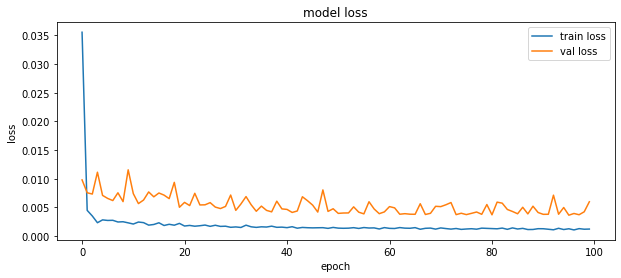

In [ ]:
# Graph model loss (train loss & val loss)
fig_icbp_univ = plt.figure(figsize=(10, 4))
plt.plot(model_univariate_icbp.history['loss'], label='train loss')
plt.plot(model_univariate_icbp.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#fig_icbp_univ.savefig("/content/drive/My Drive/DATA COLAB/NEW/loss_icbp_univ.jpeg") 

In [ ]:
pred_testing_univ_icbp = model_univ_icbp.predict(x_test_uni_icbp)
y_test_pred_univ_icbp = scI.inverse_transform(pred_testing_univ_icbp)

rmse_univ_icbp = sqrt(mean_squared_error(y_test_uni_icbp, y_test_pred_univ_icbp))
mape_univ_icbp = mean_absolute_percentage_error(y_test_uni_icbp, y_test_pred_univ_icbp)

print(mape_univ_icbp)
print(rmse_univ_icbp)

0.015627456866248855
186.15320216968766


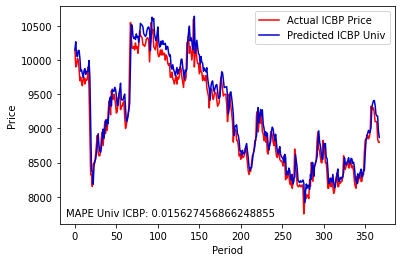

In [ ]:
#PLOT FORECASTING
plotForecast_icbp_univ = plt.gcf()
plt.plot(y_test_uni_icbp, color = 'red', label = 'Actual ICBP Price')
plt.plot(y_test_pred_univ_icbp, color = 'mediumblue', label = 'Predicted ICBP Univ')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.figtext(0.14, 0.15, "MAPE Univ ICBP: " +str(mape_univ_icbp))
plt.show()

Multivariate

In [ ]:
# DEFINE MODEL ARCHITECTURE
model_multiv_icbp = Sequential()
    
# HIDDEN LAYER
model_multiv_icbp.add(GRU(units=units_multiv, activation = "relu", 
                                 input_shape=(x_train_multi_icbp.shape[1], x_train_multi_icbp.shape[2])))
model_multiv_icbp.add(Dropout(rate = dropout_multiv))

#OUTPUT LAYER
model_multiv_icbp.add(Dense(units=1))

#COMPILE GRU
model_multiv_icbp.compile(loss = "mean_squared_error", optimizer = optimizer_multiv)

#FIT MODEL
start_time = time.time()
model_multivariate_icbp = model_multiv_icbp.fit(x_train_multi_icbp, y_train_multi_icbp, validation_data=(x_valid_multi_icbp,y_valid_multi_icbp), batch_size=batch_size_multiv,
              epochs=epochs_multiv)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Epoch 1/100
24/24 [==============================] - 2s 25ms/step - loss: 0.1301 - val_loss: 0.3047
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0351 - val_loss: 0.1453
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0233 - val_loss: 0.1055
Epoch 4/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.0504
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0049 - val_loss: 0.0145
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0031 - val_loss: 0.0182
Epoch 7/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0169
Epoch 8/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0027 - val_loss: 0.0183
Epoch 9/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0026 - val_loss: 0.0207
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.0143

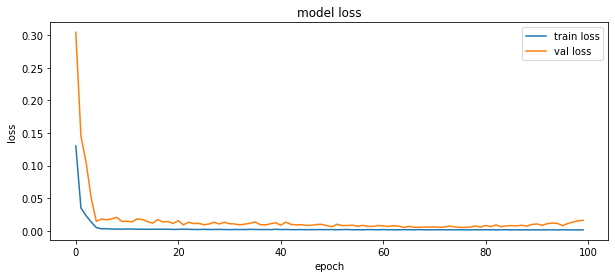

In [ ]:
# Graph model loss (train loss & val loss)
fig_icbp_multiv = plt.figure(figsize=(10, 4))
plt.plot(model_multivariate_icbp.history['loss'], label='train loss')
plt.plot(model_multivariate_icbp.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#fig_icbp_multiv.savefig("/content/drive/My Drive/DATA COLAB/TERAKHIR/loss_icbp_multiv.jpeg") 

In [ ]:
pred_testing_multiv_icbp = model_multiv_icbp.predict(x_test_multi_icbp)
y_test_pred_multiv_icbp = scI.inverse_transform(pred_testing_multiv_icbp)

rmse_multiv_icbp = sqrt(mean_squared_error(y_test_multi_icbp, y_test_pred_multiv_icbp))
mape_multiv_icbp = mean_absolute_percentage_error(y_test_multi_icbp, y_test_pred_multiv_icbp)

print(mape_multiv_icbp)
print(rmse_multiv_icbp)

0.016936999322024773
216.67297911546035


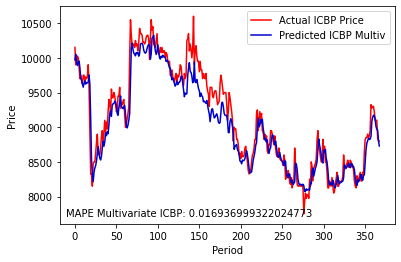

In [ ]:
#PLOT FORECASTING
plotForecast_icbp_multiv = plt.gcf()
plt.plot(y_test_multi_icbp, color = 'red', label = 'Actual ICBP Price')
plt.plot(y_test_pred_multiv_icbp, color = 'mediumblue', label = 'Predicted ICBP Multiv')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.figtext(0.14, 0.15, "MAPE Multivariate ICBP: " +str(mape_multiv_icbp))
plt.show()

In [ ]:
#plotForecast_icbp_multiv.savefig("/content/drive/My Drive/DATA COLAB/TERAKHIR/plot_icbp_multiv.jpeg") 

# FINAL FORECAST


## Forecast

In [ ]:
df_pred = pd.DataFrame(y_test_pred_univ)
df_last = df_pred[-15:].values
df_last = sc.fit_transform(df_last)

x_forecast = []

forecast = df_last[-timestep:]
current_batch = forecast.reshape((1, timestep, 1))

n_forecast=90

for i in range(n_forecast):
  current_pred = model_univ.predict(current_batch)[0]
  x_forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
  true_predictions = sc.inverse_transform(x_forecast)
true_predictions 

array([[3802.5475307 ],
       [3809.73627098],
       [3812.30485636],
       [3815.26259823],
       [3818.10430238],
       [3820.98043507],
       [3823.88645862],
       [3826.81555832],
       [3829.75967485],
       [3832.71725758],
       [3835.67178796],
       [3838.60878782],
       [3841.51421967],
       [3844.38516177],
       [3847.22326268],
       [3850.02338079],
       [3852.79072302],
       [3855.52657885],
       [3858.2201427 ],
       [3860.86917835],
       [3863.48596045],
       [3866.07163157],
       [3868.62723637],
       [3871.15363995],
       [3873.65169108],
       [3876.12207532],
       [3878.56564144],
       [3880.98300971],
       [3883.37484936],
       [3885.74171535],
       [3888.08404839],
       [3890.40232185],
       [3892.69697643],
       [3894.96828962],
       [3897.21657155],
       [3899.44203441],
       [3901.64492305],
       [3903.82533539],
       [3905.98343468],
       [3908.11923722],
       [3910.23282463],
       [3912.324

In [ ]:
forecast_result=pd.DataFrame(data=true_predictions, columns=['Forecast'])
forecast_result

,Forecast
0,3802.547531
1,3809.736271
2,3812.304856
3,3815.262598
4,3818.104302
...,...
85,3980.552355
86,3981.536823
87,3982.497346
88,3983.434233


In [ ]:
forecast1 = pd.DataFrame(forecast_result)
forecast1.columns = ['Forecast']
forecast1.to_excel("/content/drive/My Drive/DATA COLAB/NEW/forecastt.xlsx")

In [ ]:
data=pd.DataFrame(dataset_merged['Price_TLKM'])
data

In [ ]:
result = data.append(forecast_result,ignore_index=True)
result

In [ ]:
result.plot()

## Forecast Future Data

In [ ]:
#Forecast Day 1
df_pred = pd.DataFrame(y_test_pred_univ)

df_last = df_pred[-15:].values
df_last_normalized = sc.fit_transform(df_last)

x_forecast = []
x_forecast.append(df_last_normalized)
x_forecast = np.array(x_forecast)

forecast_price = model_univ.predict(x_forecast)
forecast_price_inversed = sc.inverse_transform(forecast_price)
forecast_price_inversed

In [ ]:
#Forecast Day 2
df_forecast = pd.DataFrame(forecast_price_inversed)
df_pred1= df_pred.append(df_forecast)
df_pred1 = df_pred1.reset_index().iloc[:,1:2]

df_last1 = df_pred1[-15:].values
df_last1_normalized = sc.fit_transform(df_last1)

x_forecast1 = []
x_forecast1.append(df_last1_normalized)
x_forecast1 = np.array(x_forecast1)

forecast_price1 = model_univ.predict(x_forecast1)
forecast_price1_inversed = sc.inverse_transform(forecast_price1)
forecast_price1_inversed

In [ ]:
#Forecast Day 3
df_forecast1 = pd.DataFrame(forecast_price1_inversed)
df_pred2 = df_pred1.append(df_forecast1)
df_pred2 = df_pred2.reset_index().iloc[:,1:2]

df_last2 = df_pred2[-15:].values
df_last2_normalized = sc.fit_transform(df_last2)

x_forecast2 = []
x_forecast2.append(df_last2_normalized)
x_forecast2 = np.array(x_forecast2)

forecast_price2 = model_univ.predict(x_forecast2)
forecast_price2_inversed = sc.inverse_transform(forecast_price2)
forecast_price2_inversed

In [ ]:
#Forecast Day 4
df_forecast2 = pd.DataFrame(forecast_price2_inversed)
df_pred3 = df_pred2.append(df_forecast2)
df_pred3 = df_pred3.reset_index().iloc[:,1:2]

df_last3 = df_pred3[-15:].values
df_last3_normalized = sc.fit_transform(df_last3)

x_forecast3 = []
x_forecast3.append(df_last3_normalized)
x_forecast3 = np.array(x_forecast3)

forecast_price3 = model_univ.predict(x_forecast3)
forecast_price3_inversed = sc.inverse_transform(forecast_price3)
forecast_price3_inversed

In [ ]:
#Forecast Day 5
df_forecast3 = pd.DataFrame(forecast_price3_inversed)
df_pred4 = df_pred3.append(df_forecast3)
df_pred4 = df_pred4.reset_index().iloc[:,1:2]

df_last4 = df_pred4[-15:].values
df_last4_normalized = sc.fit_transform(df_last4)

x_forecast4 = []
x_forecast4.append(df_last4_normalized)
x_forecast4 = np.array(x_forecast4)

forecast_price4 = model_univ.predict(x_forecast4)
forecast_price4_inversed = sc.inverse_transform(forecast_price4)
forecast_price4_inversed

In [ ]:
#Forecast Day 6
df_forecast4 = pd.DataFrame(forecast_price4_inversed)
df_pred5 = df_pred4.append(df_forecast4)
df_pred5 = df_pred5.reset_index().iloc[:,1:2]

df_last5 = df_pred5[-15:].values
df_last5_normalized = sc.fit_transform(df_last5)

x_forecast5 = []
x_forecast5.append(df_last5_normalized)
x_forecast5 = np.array(x_forecast5)

forecast_price5 = model_univ.predict(x_forecast5)
forecast_price5_inversed = sc.inverse_transform(forecast_price5)
forecast_price5_inversed

In [ ]:
#Forecast Day 7
df_forecast5 = pd.DataFrame(forecast_price5_inversed)
df_pred6 = df_pred5.append(df_forecast5)
df_pred6 = df_pred6.reset_index().iloc[:,1:2]

df_last6 = df_pred6[-15:].values
df_last6_normalized = sc.fit_transform(df_last6)

x_forecast6 = []
x_forecast6.append(df_last6_normalized)
x_forecast6 = np.array(x_forecast6)

forecast_price6 = model_univ.predict(x_forecast6)
forecast_price6_inversed = sc.inverse_transform(forecast_price6)
forecast_price6_inversed

In [ ]:
#Forecast Day 8
df_forecast6 = pd.DataFrame(forecast_price6_inversed)
df_pred7 = df_pred6.append(df_forecast6)
df_pred7 = df_pred7.reset_index().iloc[:,1:2]

df_last7 = df_pred7[-15:].values
df_last7_normalized = sc.fit_transform(df_last7)

x_forecast7 = []
x_forecast7.append(df_last7_normalized)
x_forecast7 = np.array(x_forecast7)

forecast_price7 = model_univ.predict(x_forecast7)
forecast_price7_inversed = sc.inverse_transform(forecast_price7)
forecast_price7_inversed

In [ ]:
#Forecast Day 9
df_forecast7 = pd.DataFrame(forecast_price7_inversed)
df_pred8 = df_pred7.append(df_forecast7)
df_pred8 = df_pred8.reset_index().iloc[:,1:2]

df_last8 = df_pred8[-15:].values
df_last8_normalized = sc.fit_transform(df_last8)

x_forecast8 = []
x_forecast8.append(df_last8_normalized)
x_forecast8 = np.array(x_forecast8)

forecast_price8 = model_univ.predict(x_forecast8)
forecast_price8_inversed = sc.inverse_transform(forecast_price8)
forecast_price8_inversed

In [ ]:
#Forecast Day 10
df_forecast8 = pd.DataFrame(forecast_price8_inversed)
df_pred9 = df_pred8.append(df_forecast8)
df_pred9 = df_pred9.reset_index().iloc[:,1:2]

df_last9 = df_pred9[-15:].values
df_last9_normalized = sc.fit_transform(df_last9)

x_forecast9 = []
x_forecast9.append(df_last9_normalized)
x_forecast9 = np.array(x_forecast9)

forecast_price9 = model_univ.predict(x_forecast9)
forecast_price9_inversed = sc.inverse_transform(forecast_price9)
forecast_price9_inversed

In [ ]:
#PRINT FORECAST
df_forecast9 = pd.DataFrame(forecast_price9_inversed)
df_pred10 = df_pred9.append(df_forecast9)
df_pred10 = df_pred10.reset_index().iloc[:,1:2]
df_pred10

In [ ]:
forecast = pd.DataFrame(df_pred10)
forecast.columns = ['Forecast']
forecast.to_excel("/content/drive/My Drive/DATA COLAB/TERAKHIR/forecast.xlsx")